Predicting Stock Price - ITC

In [73]:
#importing necessary libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as m 
import seaborn as sns 
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [74]:
#importing ITC shares data 
itc = pd.read_csv("C:\\Users\\sidd7\\Downloads\\ITC.NS.csv")
itc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,25-04-1996,6.266666,6.266666,5.911111,5.985555,3.619557,23670000
1,26-04-1996,6.044444,6.200000,5.978888,6.083333,3.678684,20560500
2,29-04-1996,6.083333,6.144444,5.935555,6.114444,3.697497,17212500
3,30-04-1996,6.114444,6.122222,6.000000,6.053333,3.660543,13378500
4,01-05-1996,6.053333,6.177777,6.077777,6.138888,3.712279,5935500


In [75]:
#finding information about our dataset
itc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6599 non-null   object 
 1   Open       6599 non-null   float64
 2   High       6599 non-null   float64
 3   Low        6599 non-null   float64
 4   Close      6599 non-null   float64
 5   Adj Close  6599 non-null   float64
 6   Volume     6599 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 361.0+ KB


In [76]:
#finding importat insights about data
itc.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6.599000e+03
mean,115.545500,116.852676,114.083025,115.451559,93.699086,4.531811e+07
std,99.697483,100.619618,98.649984,99.609031,86.408704,1.011384e+08
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,18.244444,18.555555,17.892221,18.183889,11.391212,8.807594e+06
50%,67.833336,69.133331,66.333336,67.733330,47.729122,1.394021e+07
75%,215.333328,217.808335,212.825005,215.658333,179.024781,2.654430e+07
max,346.000000,354.799988,340.299988,342.500000,295.000000,1.294168e+09


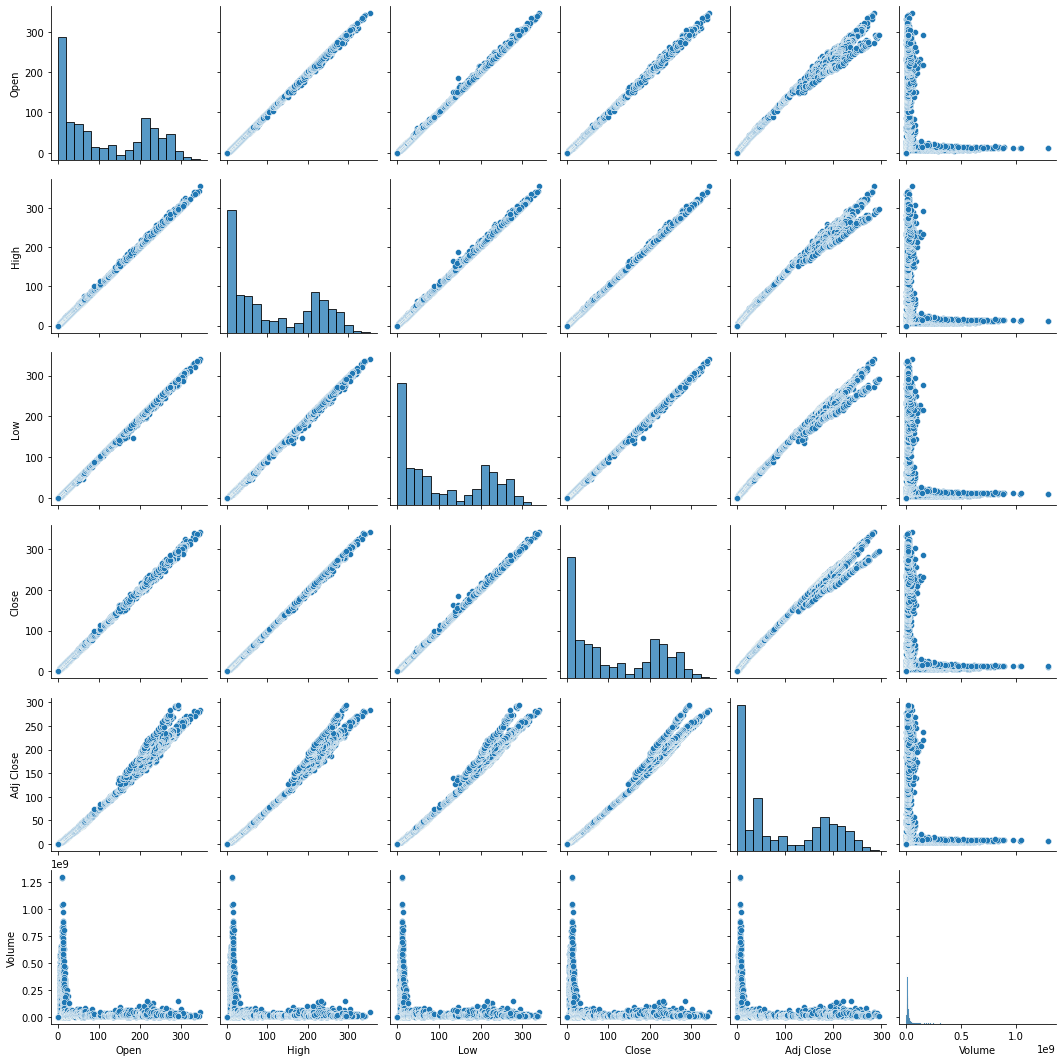

In [90]:
#making a pairplot 
sns.pairplot(itc)

In [92]:
#finding the correlation between variables 
itc_corr = itc.corr()
print(pd.DataFrame(itc_corr))

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999876  0.999852  0.999749   0.994759 -0.315020
High       0.999876  1.000000  0.999818  0.999891   0.994893 -0.314712
Low        0.999852  0.999818  1.000000  0.999879   0.994932 -0.315000
Close      0.999749  0.999891  0.999879  1.000000   0.994970 -0.314827
Adj Close  0.994759  0.994893  0.994932  0.994970   1.000000 -0.300189
Volume    -0.315020 -0.314712 -0.315000 -0.314827  -0.300189  1.000000


<AxesSubplot:>

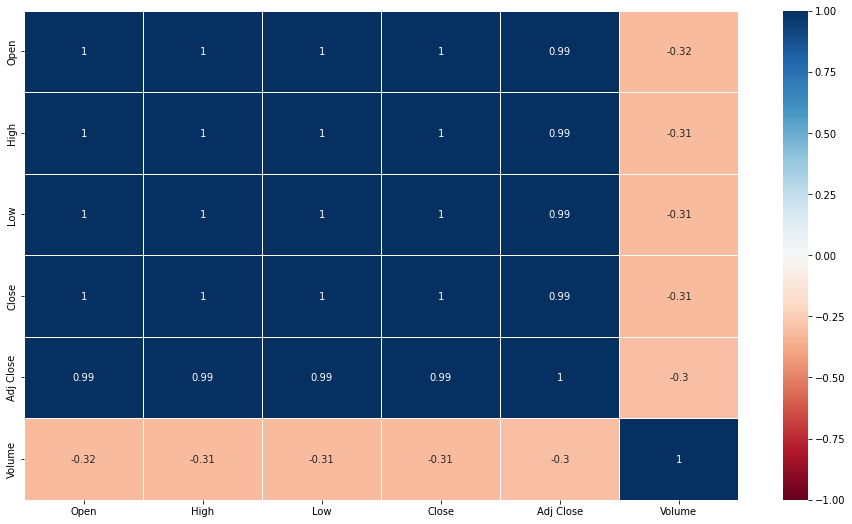

In [95]:
#making a heat map for corr
m.figure(figsize= (16,9))
sns.heatmap(itc_corr, vmin=-1, vmax=1, center=0, linewidths= 0.5, cmap="RdBu",annot=True)

In [77]:
#generating column names
itc.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [79]:
#dropping null values from data set
itc = itc.dropna()
itc.reset_index(drop= True)

,Date,Open,High,Low,Close,Adj Close,Volume
0,25-04-1996,6.266666,6.266666,5.911111,5.985555,3.619557,23670000
1,26-04-1996,6.044444,6.200000,5.978888,6.083333,3.678684,20560500
2,29-04-1996,6.083333,6.144444,5.935555,6.114444,3.697497,17212500
3,30-04-1996,6.114444,6.122222,6.000000,6.053333,3.660543,13378500
4,01-05-1996,6.053333,6.177777,6.077777,6.138888,3.712279,5935500
...,...,...,...,...,...,...,...
6594,05-07-2022,293.000000,293.000000,285.750000,286.899994,286.899994,18568655
6595,06-07-2022,286.100006,290.000000,285.299988,289.299988,289.299988,18292925
6596,07-07-2022,291.000000,293.149994,288.500000,291.950012,291.950012,13794991
6597,08-07-2022,292.899994,294.450012,290.399994,293.049988,293.049988,11110418


In [81]:
#seperating dependant variables from independent variables

#X contains all the indepent variables 
X = itc[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
#y contains dependant variable
y = itc['Close']

In [82]:
# splitting the data into trainning sample and testing sample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
#70% of the data will be used for testing the model. 
#30% of the data will used for testing.


Printing Training and Testing DateFrames

In [101]:
print("X_test: ")
print(pd.DataFrame(X_test))

X_test: 
            Open        High         Low   Adj Close     Volume
6598  293.000000  296.950012  292.049988  295.000000   12352667
578    15.057777   15.410000   15.022222    9.420360  159678000
3132   63.333332   64.333336   62.033333   45.282848   20410491
6268  209.100006  209.199997  205.800003  191.873947   19603214
6010  198.399994  199.149994  195.899994  170.539001   17271066
...          ...         ...         ...         ...        ...
3564   88.449997   90.000000   87.833336   66.214455    8730540
5714  275.700012  277.700012  272.600006  233.826279   10084682
5560  279.600006  280.950012  278.399994  232.229370    9732842
655    15.855555   16.016666   15.666666    9.805921  169551000
1013   18.333332   19.511110   17.577778   11.804815   50349870

[1980 rows x 5 columns]


In [103]:
print("y_test: ")
print(pd.DataFrame(y_test))

y_test: 
           Close
6598  295.000000
578    15.311111
3132   63.916664
6268  206.500000
6010  197.550003
...          ...
3564   89.816666
5714  276.049988
5560  279.399994
655    15.937777
1013   19.088888

[1980 rows x 1 columns]


In [102]:
print("X_train: ")
print(pd.DataFrame(X_train))

X_train: 
            Open        High         Low   Adj Close    Volume
3379   64.166664   67.666664   62.400002   47.729122  50752905
4002  132.699997  135.399994  132.233337  102.114113   8788212
3595   86.666664   91.433334   85.783333   66.669075  36162564
3223   58.950001   59.200001   56.666664   41.596996  10665570
5612  276.850006  280.299988  273.750000  233.572128  11362662
...          ...         ...         ...         ...       ...
4931  231.166672  231.166672  223.600006  184.073715   9368313
3264   55.033333   57.483334   54.583332   40.727882  22202034
1653   14.957777   15.244444   14.800000    9.694330  13381335
2607   68.666664   68.666664   63.033333   43.570824  28758618
2732   62.000000   62.200001   61.200001   42.990566   9120144

[4619 rows x 5 columns]


In [104]:
print("y_train: ")
print(pd.DataFrame(y_train))

y_train: 
           Close
3379   65.900002
4002  134.733337
3595   90.433334
3223   57.433334
5612  275.750000
...          ...
4931  226.066666
3264   56.233334
1653   15.014444
2607   63.716667
2732   61.916664

[4619 rows x 1 columns]


In [83]:
#creating a Linear Regression instance
reg = linear_model.LinearRegression()

In [84]:
# fitting the trainning data to regression object 
reg.fit(X_train, y_train)

LinearRegression()

In [85]:
#coefficient of regression 
print(pd.DataFrame(reg.coef_, index = X.columns, columns=["Coeff"]))

                  Coeff
Open      -5.389019e-01
High       7.851772e-01
Low        7.525609e-01
Adj Close  8.175700e-04
Volume    -1.444712e-10


In [111]:
#predicting the output based upon the testing data
predicted_closing = reg.predict(X_test)
pc = (pd.DataFrame(predicted_closing, columns= ["Predicted Closing"]))
pc

,Predicted Closing
0,295.319284
1,15.309039
2,63.134904
3,206.640110
4,197.047867
...,...
1975,89.187240
1976,274.840636
1977,279.654338
1978,15.839327


Residuals

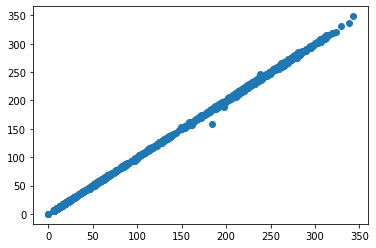

In [87]:
# Scatter plot b/w actual closing price and predicted closing price
m.scatter(y_test, predicted_closing)

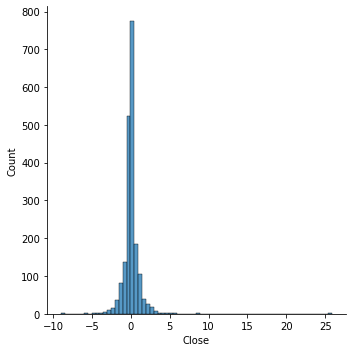

In [99]:
#making a distribution plot
sns.displot(y_test-predicted_closing, bins=70)
#the distribution shows normal distribution

In [88]:
#Regression model accuracy metrics 
from sklearn import metrics
import math
print("Mean absolute error: ", metrics.mean_absolute_error(y_test, predicted_closing))
print("Mean squared error: ", metrics.mean_squared_error(y_test, predicted_closing))
print("Root Mean squared absolute error: ", math.sqrt(metrics.mean_squared_error(y_test, predicted_closing)))

Mean absolute error:  0.5565375304754631
Mean squared error:  1.2001531702038777
Root Mean squared absolute error:  1.0955150250927084
